# Phosphoproteomics label-free

# Data Processing

This notebook contains data processing steps for label-free phosphoproteomic workflow.

Demonstration phosphoproteomic dataset is available from [PRIDE PXD000293](https://www.ebi.ac.uk/pride/archive/projects/PXD000293) as MaxQuant_output_Jurkat.zip.

MaxQuant output Phospho (STY)Sites.txt is used as input to generate processed '.csv' and '.pickle' files for the subsequent data analysis. Information relative to the kind of experiment are contained in design.csv.

In [1]:
%matplotlib inline
%load_ext autoreload
    
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
from datetime import datetime as dt
dtstr = dt.strftime(dt.now(), "%Y%m%d")
import numpy as np
import pandas as pd
import padua
import padua.visualize as viz
import sqlite3

Initial steps include uploading table files containing phospho-data and experimental design, and apply standard filters steps used for MaxQuant tables.

In [2]:
# Load input files
PHOSPHOSTY_FILE = r'Phospho (STY)Sites.txt'
DESIGN_FILE = r'design.csv'

In [3]:
# Define where to save output files
SOURCE_FOLDER = os.path.dirname(PHOSPHOSTY_FILE)
BASENAME = os.path.splitext(os.path.basename(PHOSPHOSTY_FILE))[0]

In [4]:
# Read input file Phospho(STY).txt from MaxQuant
df = padua.io.read_maxquant(PHOSPHOSTY_FILE)

C:\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (1,417,948,949,951,952) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
%autoreload 2

# Apply standard filter steps and save filtered output
df = padua.filters.remove_reverse(df)
df = padua.filters.remove_contaminants(df)
df.to_csv( os.path.join(SOURCE_FOLDER,  BASENAME + '-after-filters.csv'))
df.shape

(18619, 969)

A preliminary analysis is performed calculating the number of phosphosites, phosphopeptides and phosphoproteins, and the kind of modification and phosphoproteins identified.  

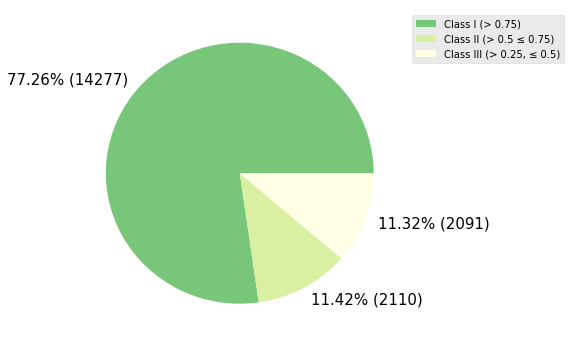

In [6]:
# Calculate number of phosphosites according to their localization probabilities
ax = viz.modificationlocalization(df)
ax.figure.savefig( os.path.join(SOURCE_FOLDER,  BASENAME + '-modification_localisation.tiff'), bbox_inches='tight', dpi=300 )

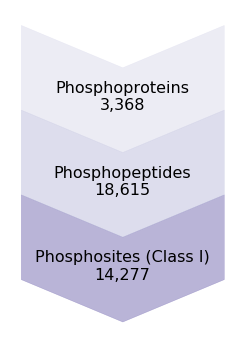

In [7]:
# Calculate quantified phosphovalues
ax = viz.sitespeptidesproteins(df, labels=['Phosphosites (Class I)','Phosphopeptides','Phosphoproteins'])
ax.figure.savefig( os.path.join(SOURCE_FOLDER, BASENAME + '-sitespeptidesproteins.tiff'), bbox_inches='tight', dpi=300 )

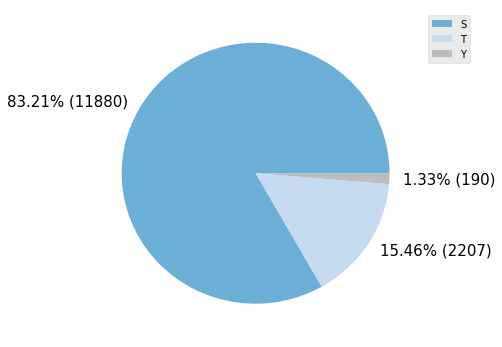

In [8]:
# Calculate distribution of modifications on phosphosites Class I 
df = padua.filters.filter_localization_probability(df)
ax = viz.modifiedaminoacids(df)
ax.figure.savefig( os.path.join(SOURCE_FOLDER,  BASENAME + '-modification_amino_acids.tiff'), bbox_inches='tight', dpi=300 )

C:\Anaconda2\envs\py36\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


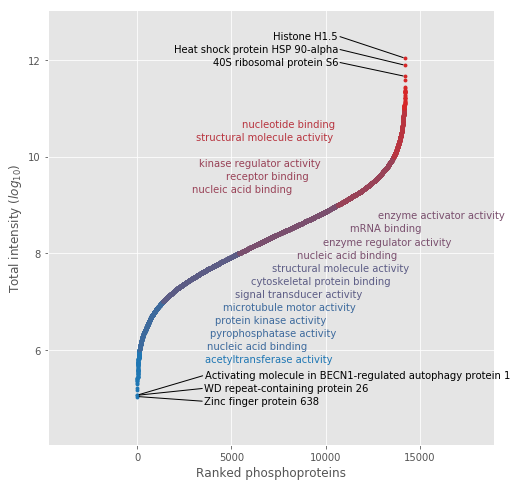

In [9]:
# Visualize types of phosphopeptides ranked according to their abundances. 
ax = viz.rankintensity(df, show_go_enrichment=True)
ax.figure.savefig( os.path.join(SOURCE_FOLDER, BASENAME + '-rank_intensity.tiff'), bbox_inches='tight', dpi=300 )

The filtered DataFrame is subsequently processed in order to select specific columns for the the subsequent Statistical Analysis workflow.

In [10]:
%autoreload 2

# Prepare phospho DataFrame for next statistical analysis
df = padua.process.transform_expression_columns(df, fn=np.log2, prefix="Intensity")
df = padua.process.expand_side_table(df)
df = padua.normalization.subtract_column_median(df)
df = padua.filters.filter_intensity_lfq(df)
df = padua.filters.filter_select_columns_intensity(df, prefix="Intensity", columns=['Proteins','Amino acid','Positions','Gene names','Multiplicity', 'Positions within proteins'])

df.shape

C:\Anaconda2\envs\py36\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Anaconda2\envs\py36\lib\site-packages\padua\process.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  multi1['Multiplicity'] = '___1'
C:\Anaconda2\envs\py36\lib\site-packages\padua\process.py:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

(42831, 108)

In [11]:
# Check the processed DataFrame
df

Intensity OR8_0min_A1  Intensity OR8_0min_A2  \
id                                                        
0___1                        NaN                    NaN   
2___1                  -1.783469              -1.191186   
3___1                        NaN                    NaN   
5___1                        NaN                    NaN   
6___1                        NaN                    NaN   
7___1                        NaN                    NaN   
8___1                  -1.107104              -0.443604   
9___1                  -2.278943                    NaN   
10___1                  0.465521               1.791962   
11___1                       NaN              -3.302289   
12___1                       NaN                    NaN   
13___1                  1.566273                    NaN   
14___1                       NaN              -0.097248   
15___1                       NaN                    NaN   
16___1                       NaN                    NaN   
17___1                 -1.518849              -0.617806   
18___1                       NaN                    NaN   
19___1                       NaN                    NaN   
21___1                       NaN                    NaN   
22___1                       NaN                    NaN   
24___1                       NaN                    NaN   
25___1                  0.237654               0.562256   
28___1                 -0.397841              -0.179383   
29___1                       NaN                    NaN   
30___1                 -1.209411                    NaN   
31___1                       NaN                    NaN   
32___1                       NaN                    NaN   
33___1                  1.988531               2.065086   
36___1                 -1.141672              -0.769269   
37___1                 -0.970724              -0.405386   
...                          ...                    ...   
18789___3                    NaN                    NaN   
18790___3                    NaN                    NaN   
18791___3                    NaN                    NaN   
18792___3                    NaN                    NaN   
18793___3                    NaN                    NaN   
18796___3                    NaN                    NaN   
18797___3                    NaN                    NaN   
18798___3                    NaN                    NaN   
18800___3                    NaN                    NaN   
18801___3                    NaN                    NaN   
18802___3                    NaN                    NaN   
18805___3                    NaN                    NaN   
18807___3                    NaN                    NaN   
18808___3                    NaN                    NaN   
18809___3                    NaN                    NaN   
18811___3                    NaN                    NaN   
18812___3                    NaN                    NaN   
18814___3                    NaN                    NaN   
18816___3                    NaN                    NaN   
18817___3                    NaN                    NaN   
18819___3              -2.254420              -3.507201   
18821___3                    NaN                    NaN   
18824___3                    NaN                    NaN   
18826___3                    NaN                    NaN   
18827___3                    NaN                    NaN   
18828___3                    NaN                    NaN   
18829___3                    NaN                    NaN   
18830___3                    NaN                    NaN   
18832___3                    NaN                    NaN   
18833___3                    NaN                    NaN   

           Intensity OR8_0min_A3  Intensity OR8_0min_B1  \
id                                                        
0___1                        NaN                    NaN   
2___1                  -2.213828              -0.998854   
3___1                        NaN                    NaN  

The last two important steps consist first in matching the processed DataFrame with the experimental design, and then filtering the quantified phospho-data according to arbitrary criteria. 

In [12]:
%autoreload 2

# Load input file experiment_design.csv
design = pd.read_csv(DESIGN_FILE)

In [13]:
%autoreload 2

# Create DataFrame with experiment annotation 
df = padua.process.build_index_from_design(df, design, remove_prefix="Intensity", types={'Timepoint':int, 'Replicate': int, 'Technical': int})
df.to_csv( os.path.join(SOURCE_FOLDER, BASENAME + '-dataframe.csv'))
df

Group                                                                                       Control  \
Timepoint                                                                                        0    
Replicate                                                                                         1   
Technical                                                                                         1   
id        Multiplicity Proteins Positions within proteins Gene names Amino acid Positions             
0___1     ___1         A0AVK6   413                       E2F8       S          413             NaN   
2___1     ___1         A0AVK6   71                        E2F8       S          71        -1.783469   
3___1     ___1         A0AVK6   357                       E2F8       S          357             NaN   
5___1     ___1         A0FGR8   737                       ESYT2      S          737             NaN   
6___1     ___1         A0FGR8   738                       ESYT2      S          738             NaN   
7___1     ___1         A0FGR8   739                       ESYT2      S          739             NaN   
8___1     ___1         A0FGR8   743                       ESYT2      S          743       -1.107104   
9___1     ___1         A0FGR8   755                       ESYT2      S          755       -2.278943   
10___1    ___1         A0FGR8   758                       ESYT2      S          758        0.465521   
11___1    ___1         A0FGR8   761                       ESYT2      S          761             NaN   
12___1    ___1         A0FGR8   688                       ESYT2      S          688             NaN   
13___1    ___1         A0FGR8   691                       ESYT2      S          691        1.566273   
14___1    ___1         A0FGR8   693                       ESYT2      S          693             NaN   
15___1    ___1         A0FGR8   699                       ESYT2      S          699             NaN   
16___1    ___1         A0FGR8   704                       ESYT2      S          704             NaN   
17___1    ___1         A0JLT2   226                       MED19      S          226       -1.518849   
18___1    ___1         A0JLT2   234                       MED19      S          234             NaN   
19___1    ___1         A0JLT2   235                       MED19      S          235             NaN   
21___1    ___1         A0JNW5   414                       UHRF1BP1L  S          414             NaN   
22___1    ___1         A0JNW5   418                       UHRF1BP1L  S          418             NaN   
24___1    ___1         A0JNW5   891                       UHRF1BP1L  S          891             NaN   
25___1    ___1         A0MZ66   506                       KIAA1598   S          506        0.237654   
28___1    ___1         A0MZ66   494                       KIAA1598   S          494       -0.397841   
29___1    ___1         A1A4S6   643                       ARHGAP10   S          643             NaN   
30___1    ___1         A1A4S6   589                       ARHGAP10   S          589       -1.209411   
31___1    ___1         A1A4S6   591                       ARHGAP10   S          591             NaN   
32___1    ___1         A1A5D9   473                       CCDC64B    S          473             NaN   
33___1    ___1         A1KXE4   6                         FAM168B    S          6          1.988531   
36___1    ___1         A1L020   308                       MEX3A      S          308       -1.141672   
37___1    ___1         A1L020   338                       MEX3A      S          338       -0.970724   
...                                                                                             ...   
18789___3 ___3         Q9HCD5   127                       NCOA5      Y          127             NaN   
18790___3 ___3         Q9NPQ8   435                       RIC8A      Y          435             NaN   
18791___3 ___3         Q9NQG5   165                       RPRD1B     Y          165   

In [14]:
# Filter DataFrame: At least 1 phosphosite overall time points
MINIMUM_VALID_VALUES_PER_GROUP = 1
MINIMUM_VALID_VALUES_LEVELS = [0]

df_all = padua.filters.minimum_valid_values_in_any_group(df, levels=MINIMUM_VALID_VALUES_LEVELS, n=MINIMUM_VALID_VALUES_PER_GROUP, invalid=np.nan)
df_all.to_csv( os.path.join(SOURCE_FOLDER, BASENAME + '-after_valid_values_total.csv'))
df_all.shape

(18965, 102)

In [15]:
# Filter DataFrame: At least 2 biological replicates
MINIMUM_VALID_VALUES_PER_GROUP = 9
MINIMUM_VALID_VALUES_LEVELS = [1]

df = padua.filters.minimum_valid_values_in_any_group(df, levels=MINIMUM_VALID_VALUES_LEVELS, n=MINIMUM_VALID_VALUES_PER_GROUP, invalid=np.nan)
df.to_csv( os.path.join(SOURCE_FOLDER, BASENAME + '-after_valid_values_2bioreplicate.csv'))
df.shape

(10732, 102)

## Phospho-DataFrame

In [16]:
phospho_df=df.head(25)
phospho_df.to_html('/Notebook/PaDua/dataframe.html')
phospho_df

Group                                                                                    Control  \
Timepoint                                                                                     0    
Replicate                                                                                      1   
Technical                                                                                      1   
id     Multiplicity Proteins Positions within proteins Gene names Amino acid Positions             
2___1  ___1         A0AVK6   71                        E2F8       S          71        -1.783469   
8___1  ___1         A0FGR8   743                       ESYT2      S          743       -1.107104   
10___1 ___1         A0FGR8   758                       ESYT2      S          758        0.465521   
11___1 ___1         A0FGR8   761                       ESYT2      S          761             NaN   
13___1 ___1         A0FGR8   691                       ESYT2      S          691        1.566273   
17___1 ___1         A0JLT2   226                       MED19      S          226       -1.518849   
25___1 ___1         A0MZ66   506                       KIAA1598   S          506        0.237654   
30___1 ___1         A1A4S6   589                       ARHGAP10   S          589       -1.209411   
33___1 ___1         A1KXE4   6                         FAM168B    S          6          1.988531   
36___1 ___1         A1L020   308                       MEX3A      S          308       -1.141672   
37___1 ___1         A1L020   338                       MEX3A      S          338       -0.970724   
47___1 ___1         A2RU30   7                         TESPA1     S          7         -0.075706   
49___1 ___1         A2RU30   334                       TESPA1     S          334             NaN   
50___1 ___1         A2RU30   454                       TESPA1     S          454        1.873952   
53___1 ___1         A2RU67   62                        KIAA1467   S          62              NaN   
54___1 ___1         A3KN83   794                       SBNO1      S          794       -3.330665   
62___1 ___1         A3KN83   815                       SBNO1      S          815        0.604288   
66___1 ___1         A4D1P6   269                       WDR91      S          269       -5.090339   
67___1 ___1         A5PL33   253                       KRBA1      S          253       -2.103513   
68___1 ___1         A5PL33   493                       KRBA1      S          493       -2.367283   
72___1 ___1         A5PLL1   228                       ANKRD34B   S          228             NaN   
73___1 ___1         A6H8Y1   2227                      BDP1       S          2227       2.797163   
74___1 ___1         A6NC98   1345                      CCDC88B    S          1345       0.612738   
75___1 ___1         A6NC98   1475                      CCDC88B    S          1475      -1.519223   
77___1 ___1         A6NC98   597                       CCDC88B    S          597       -0.888472   

Group                                                                                             \
Timepoint                                                                                          
Replicate                                                                                          
Technical                                                                                      2   
id     Multiplicity Proteins Positions within proteins Gene names Amino acid Positions             
2___1  ___1         A0AVK6   71                        E2F8       S          71        -1.191186   
8___1  ___1         A0FGR8   743                       ESYT2      S          743       -0.443604   
10___1 ___1         A0FGR8   758                       ESYT2      S          758        1.791962   
11___1 ___1         A0FGR8   761                       ESYT2      S          761       -3.302289   
13___1 ___1         A0FGR8   691                       ESYT2      S          691             NaN   

Finally both pickle and csv processed files can be exported for he next analysis step.

In [17]:
# Export output for next analysis
df.to_csv( os.path.join(SOURCE_FOLDER, BASENAME + '-processed.csv'))
df.to_pickle( os.path.join(SOURCE_FOLDER, BASENAME + '-processed.pickle'))